In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Display the first few rows of the dataset
print(df.head())

   Feature1  Feature2
0  0.836857  2.136359
1 -1.413658  7.409623
2  1.155213  5.099619
3 -1.018616  7.814915
4  1.271351  1.892542


In [8]:
df.describe()

,Feature1,Feature2
count,300.000000,300.000000
mean,-0.006328,3.967821
std,1.636000,2.593963
min,-3.122407,-0.765892
25%,-1.498837,1.916025
50%,-0.044497,3.529012
75%,1.433350,5.607633
max,3.437618,9.282932


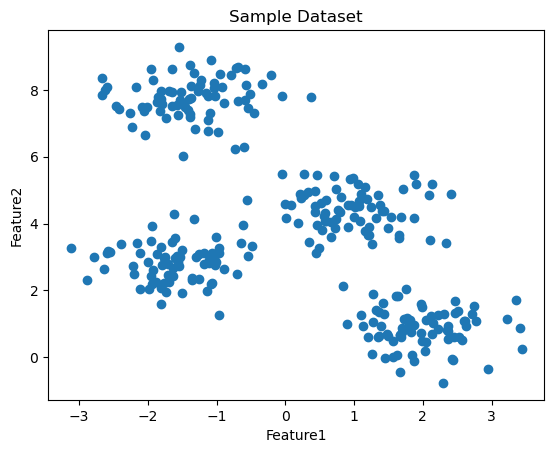

In [2]:
# Plot the dataset
plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Sample Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [3]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

   Feature1  Feature2  Cluster
0  0.836857  2.136359        0
1 -1.413658  7.409623        2
2  1.155213  5.099619        1
3 -1.018616  7.814915        2
4  1.271351  1.892542        0


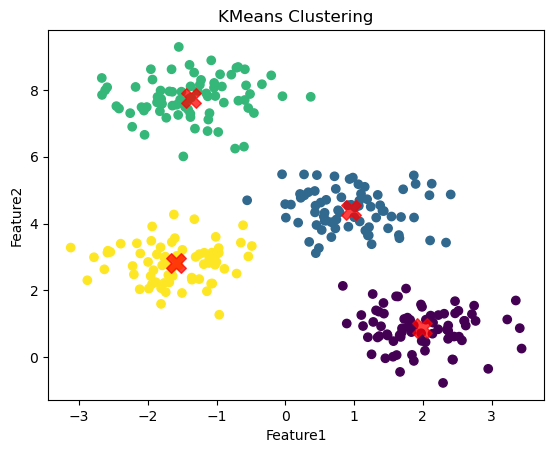

In [4]:
# Plot the clustered data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


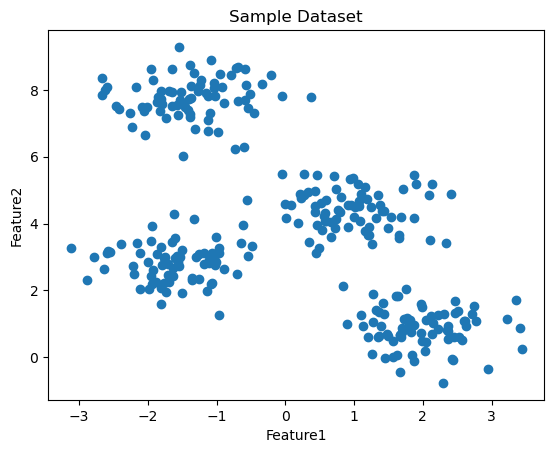

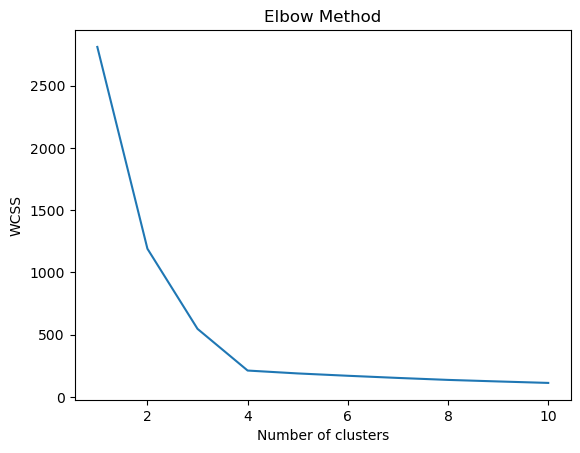

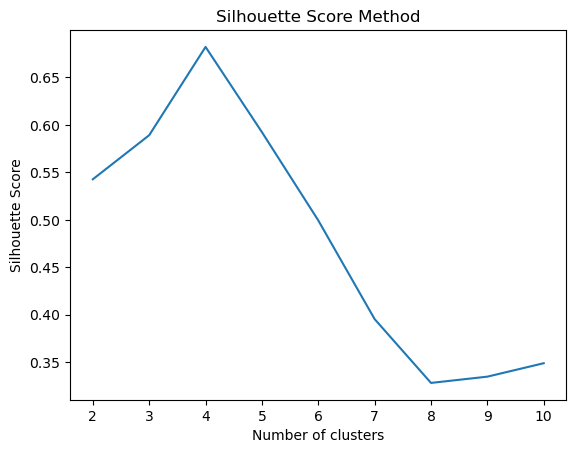

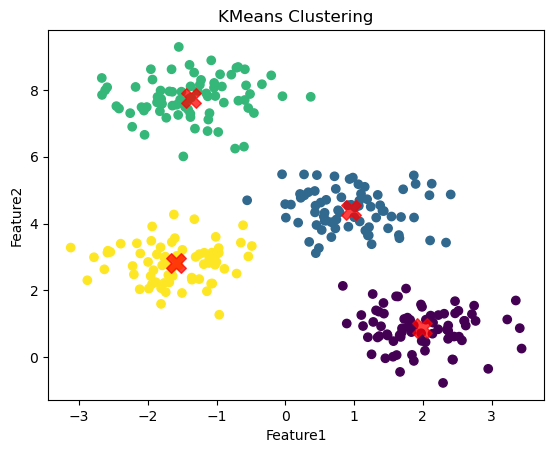

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Plot the dataset
plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Sample Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['Feature1', 'Feature2']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score Method
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['Feature1', 'Feature2']])
    score = silhouette_score(df[['Feature1', 'Feature2']], kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply KMeans clustering with optimal number of clusters
optimal_clusters = 4  # Replace with the optimal number from the above methods
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

# Plot the clustered data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


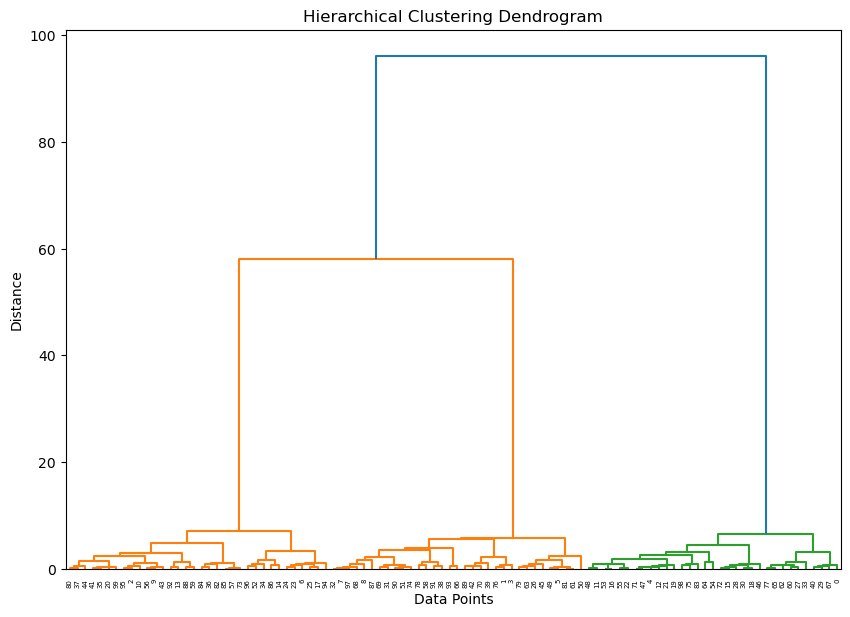

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Create a sample dataset
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


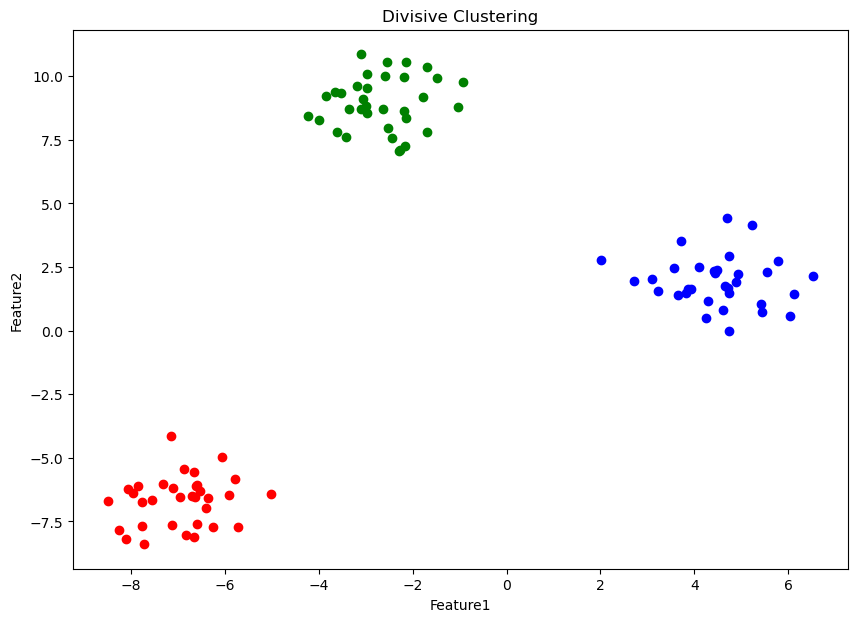

In [7]:
from sklearn.cluster import KMeans
import numpy as np

def divisive_clustering(X, num_clusters):
    # Start with all points in one cluster
    clusters = [X]
    while len(clusters) < num_clusters:
        # Find the cluster to split
        max_size = max(len(cluster) for cluster in clusters)
        for cluster in clusters:
            if len(cluster) == max_size:
                to_split = cluster
                break
        # Split the cluster
        kmeans = KMeans(n_clusters=2, random_state=0).fit(to_split)
        labels = kmeans.labels_
        new_clusters = [to_split[labels == i] for i in range(2)]
        # Replace the old cluster with the new clusters
        clusters.remove(to_split)
        clusters.extend(new_clusters)
    return clusters

# Create a sample dataset
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform divisive clustering
clusters = divisive_clustering(X, num_clusters=3)

# Plot the clusters
colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 7))
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i])
plt.title('Divisive Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()
